In [84]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
)
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
)
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

data = pd.read_csv("bodyPerformance.csv")
data = data[data["gender"] == "F"]
X = data.drop(columns=["gender", "class"])
y = data["class"]

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [85]:
data.head()
data.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [53]:
clf = SVC(kernel="linear", decision_function_shape="ovo", random_state=42)
clf.fit(X_train, y_train) # provádím trénování
y_pred = clf.predict(X_test) # predikuji na testovacích datech


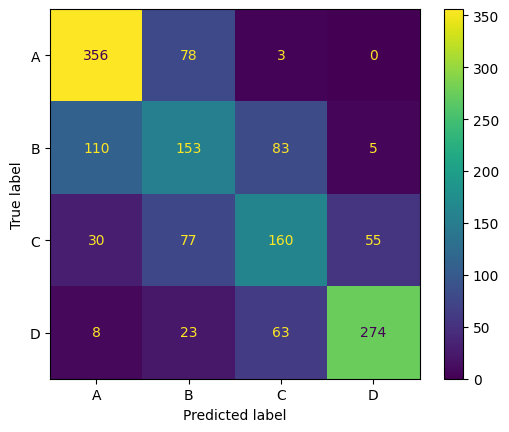

In [54]:
ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test)

In [86]:
accuracy_score(y_test, y_pred)

0.618403247631935

In [87]:
vsechny = range(1, 51)
accuracy_scores = []

for jeden in vsechny:
    clf=KNeighborsClassifier(n_neighbors=jeden)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

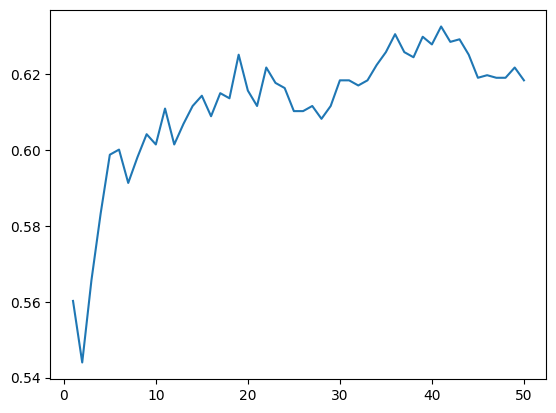

In [88]:
plt.plot(vsechny, accuracy_scores)

In [96]:
pd.DataFrame([vsechny,accuracy_scores]).T 

,0,1
0,1.0,0.560217
1,2.0,0.543978
2,3.0,0.565629
3,4.0,0.583221
4,5.0,0.598782
5,6.0,0.600135
6,7.0,0.591340
7,8.0,0.598106
8,9.0,0.604195
9,10.0,0.601488
